# Criminality Analysis in and around Eindhoven based on Nightclub density

## Abstract

In this project I will analyze the criminality in the communities (like Veldhoven, Best, Son en Breugel, etc.) that surround Eindhoven en within Eindhoven as well. The data will be normalized with the total number of citizens and then compared with the nightclub density in these communities centers equally normalized as above. The idea is to see whether there is a correlation between the number of nightclubs and the number of crimes in a big city and its surrounding neighbourhoods.

# Business case

The idea is that the community councellors have a tool to predict crime development in relation to the number of nightclubs in a certain neighbourhood. Based on these results they might adopt a different security strategy (e.g. police surveillance) per Neighbourhood.


# Data Sets

I will need the following datasets:

    Total number of citizens per community

    Crime numbers per community

    Extract the number of nightclubs in the center of the community
    
The first two data sets, I can obtain from the Dutch Office of Statistics (CBS.nl).

The number of nightclubs can be obtained from searches on Foursquare.


# Methodology

In a scatter plot I will present the results with on the x-axis the number of citizens and on the y-axis the crime number.
Another scatter plot will present the night clubs against the number of citizens.

The crime numbers per nightclub will be presented in a map.

In this first week, only a map of Eindhoven and its Neighbourhoods will be presented.

In [1]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from math import sqrt # calculating square roots
import sys
import types
from botocore.client import Config
import ibm_boto3

import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
from sklearn import linear_model

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.17.0-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  24.11 MB/s
geopy-1.17.0-p 100% |################################| Time: 0:00:00  35.65 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  55.06 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  28.33 MB/s
vincent-0.4.4- 100% |###################

In [2]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: G0J5OAHPW0BXWMYQZZ1OWZHBA52QXULOEWEDSC2RBSVIVLHL
CLIENT_SECRET:QSIB15KATEOQOLA3VDOSJORDYLL5KDE1P5JSHVTHAW0FB2A2


In [3]:
# Make a list of cities/neighbourhods of Eindhoven:
cities = ["Eindhoven","Eersel","Best","Waalre","Valkenswaard","Geldrop","Nuenen","Son en Breugel", "Oirschot", "Veldhoven"]

# Define search strings for each neighbourhood to be used in getting its longitude and latitude from Nominatim:
addresses = dict([(k, "Center "+str(k)+" The Netherlands") for k in cities])

In [4]:
# Store location information in a list:
geolocator = Nominatim()
locations = []
for key, value in addresses.items(): locations.append(geolocator.geocode(addresses[key]))

#for item in range(0,len(locations)): print(locations[item].latitude, locations[item].longitude)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [5]:
# Make dataframe with place & location:
headers = ["place","location"]
df=pd.DataFrame(locations, columns=headers)

# Split location in latitude and Longitude:
df[['lat', 'lng']]=df["location"].apply(pd.Series)
df.drop(["location"], axis=1, inplace=True)

# Clean up Place:
df['place']=df['place'].str.replace(',.*','')
df.set_index("place", inplace=True)
df.head(10)

,lat,lng
place,,
Best,51.510017,5.398662
Geldrop,51.422199,5.559182
Eindhoven,51.439265,5.478633
Oirschot,51.503239,5.315549
Eersel,51.358637,5.320131
Nuenen,51.486030,5.544007
Valkenswaard,51.350688,5.459450
Son en Breugel,51.517813,5.491435
Veldhoven,51.407706,5.392731


# Visualize Eindhoven and its Neighbourhoods

In [6]:
# generate map centred around EindhovenL
Region_map = folium.Map(location=[df.lat['Eindhoven'], df.lng['Eindhoven']], zoom_start=12) 

# add a red circle marker to represent the center of Eindhoven
folium.features.CircleMarker(
    [df.lat['Eindhoven'], df.lng['Eindhoven']],
    radius=10,
    color='red',
    popup='Eindhoven',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(Region_map)

# add the Neighbourhoods as blue circle markers
for lat, lng, label in zip(df.lat, df.lng, df.index):
    if label != 'Eindhoven':
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='blue',
            popup=label,
            fill = True,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(Region_map)
# display map
Region_map

# Data gathering and data analysis

The data has been extracted from the Central Office (Bureau) of Statistics (CBS) in the Netherlands.
The individal files have been processed in a Cognitive Class Jupyter notebook due to the ease of dataaccess
and concatenated into a complete overview of registered crimes in Eindhoven and its surrounding neighbourhoods.

The data will be loaded, processes and the total number of registered crimes will be concatenated with
the initial dataframe df.

Thereafter, the total population of Eindhoven and its Neighbourhoods (also extracted from the CBS website)
will be loaded and added to the dataframe df.

In [7]:
# The code was removed by Watson Studio for sharing.

,Crime,Eindhoven,Eersel,Best,Waalre,Valkenswaard,Geldrop,Nuenen,SonenBreugel,Oirschot,Veldhoven
0,"Misdrijven, totaal",18600,700,1100,475,1220,1565,705,665,675,1370
1,1 Vermogensmisdrijven,11535,380,645,330,610,915,435,450,430,775
2,1.1 Diefstal/verduistering en inbraak,10315,325,540,235,475,775,375,375,355,620
3,1.1.1 Diefstal en inbraak met geweld,175,5,10,5,5,5,15,10,5,10
4,1.1.2 Diefstal en inbraak zonder geweld,10140,320,530,225,475,765,360,370,350,610


In [8]:
# Rename one column to get same signature as other table and transpose dataframe:
df_data_1.rename(columns={'SonenBreugel': 'Son en Breugel'}, inplace=True)
df_data_1.set_index("Crime", inplace=True)
df_data_1 = df_data_1.transpose()
# Keep only the relevant data being the total number of crimes:
df_data_1 = df_data_1[['Misdrijven, totaal']]
df_data_1.rename(columns={'Misdrijven, totaal': 'Totals'}, inplace=True)

In [9]:
df_data_1.head(10)

Crime,Totals
Eindhoven,18600
Eersel,700
Best,1100
Waalre,475
Valkenswaard,1220
Geldrop,1565
Nuenen,705
Son en Breugel,665
Oirschot,675
Veldhoven,1370


In [10]:
# Add column Crime to df dataframe from data_1 its Totals:
df['Crimes'] = df_data_1['Totals']

In [11]:
df.head(20)

,lat,lng,Crimes
place,,,
Best,51.510017,5.398662,1100
Geldrop,51.422199,5.559182,1565
Eindhoven,51.439265,5.478633,18600
Oirschot,51.503239,5.315549,675
Eersel,51.358637,5.320131,700
Nuenen,51.486030,5.544007,705
Valkenswaard,51.350688,5.459450,1220
Son en Breugel,51.517813,5.491435,665
Veldhoven,51.407706,5.392731,1370


In [12]:
# The code was removed by Watson Studio for sharing.

,Perioden,Regio's,Bevolkingsontwikkeling/Bevolking aan het begin van de periode (aantal)
0,2018 januari*,Best,29497
1,2018 januari*,Eersel,18778
2,2018 januari*,Eindhoven,229126
3,2018 januari*,Geldrop-Mierlo,39252
4,2018 januari*,"Nuenen, Gerwen en Nederwetten",23019


In [13]:
# Clean up neighbourhood names and rename this column name into city:
df_data_2['city']=df_data_2['Regio\'s'].str.replace('[\,,-].*','')
df_data_2.set_index('city', inplace=True)
df_data_2.head(10)

,Perioden,Regio's,Bevolkingsontwikkeling/Bevolking aan het begin van de periode (aantal)
city,,,
Best,2018 januari*,Best,29497
Eersel,2018 januari*,Eersel,18778
Eindhoven,2018 januari*,Eindhoven,229126
Geldrop,2018 januari*,Geldrop-Mierlo,39252
Nuenen,2018 januari*,"Nuenen, Gerwen en Nederwetten",23019
Oirschot,2018 januari*,Oirschot,18558
Son en Breugel,2018 januari*,Son en Breugel,16753
Valkenswaard,2018 januari*,Valkenswaard,30654
Veldhoven,2018 januari*,Veldhoven,44925


In [14]:
# Add column Citizens to df dataframe from data_2 its last column (totals):
df['Citizens'] = df_data_2.iloc[:,-1]
df.head(10)

,lat,lng,Crimes,Citizens
place,,,,
Best,51.510017,5.398662,1100,29497
Geldrop,51.422199,5.559182,1565,39252
Eindhoven,51.439265,5.478633,18600,229126
Oirschot,51.503239,5.315549,675,18558
Eersel,51.358637,5.320131,700,18778
Nuenen,51.486030,5.544007,705,23019
Valkenswaard,51.350688,5.459450,1220,30654
Son en Breugel,51.517813,5.491435,665,16753
Veldhoven,51.407706,5.392731,1370,44925


# Data Manipulations and Assumptions

I am going to extend my data frame with 2 additional columns:
1. Relative Crime
This is the number of crimes committed per 1000 habitants. The assumption here is that in larger cities crimes will proportionally increase with the number of citizens.

2. Distance
This is an indication of the radius of the center of a city/neighbourhood. I will assume that the center radius of a city with 10k citizens is 300m. The radias follows a square root increase with the increase of citizens. So a city with 40k citizens will have an assumped radius of 600m. And a city of 200k, a radius of 300*sqrt(20).

In [15]:
# Define Relative Crime rate as the number of crimes per 1000 citizens:
df['RelCrime'] = (df['Crimes']/(df['Citizens']/1000)).astype(int)

In [16]:
# Define Radius as the radius of the center which increases with sqrt of the number of citizens.
# Assume center radius of DefaultRadius [m] for a city of 10k citizens:
DefaultRadius = 300
df['Radius'] = (DefaultRadius*df['Citizens'].apply(sqrt)/sqrt(10000)).astype(int)

In [17]:
df.head(10)

,lat,lng,Crimes,Citizens,RelCrime,Radius
place,,,,,,
Best,51.510017,5.398662,1100,29497,37,515
Geldrop,51.422199,5.559182,1565,39252,39,594
Eindhoven,51.439265,5.478633,18600,229126,81,1436
Oirschot,51.503239,5.315549,675,18558,36,408
Eersel,51.358637,5.320131,700,18778,37,411
Nuenen,51.486030,5.544007,705,23019,30,455
Valkenswaard,51.350688,5.459450,1220,30654,39,525
Son en Breugel,51.517813,5.491435,665,16753,39,388
Veldhoven,51.407706,5.392731,1370,44925,30,635


## Data Visualisation

First some analysis on this data set to get a better understanding of the figures.

In [18]:
# The describe function summarizes the details of the values: 
df.describe()

,lat,lng,Crimes,Citizens,RelCrime,Radius
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,51.438323,5.440747,2707.500000,46763.700000,39.500000,575.900000
std,0.063021,0.083926,5595.528597,64805.785918,15.218775,314.292309
min,51.350688,5.315549,475.000000,16753.000000,27.000000,388.000000
25%,51.392657,5.394214,681.250000,18613.000000,31.500000,408.750000
50%,51.430732,5.453568,902.500000,26258.000000,37.000000,485.000000
75%,51.498936,5.488234,1332.500000,37102.500000,39.000000,576.750000
max,51.517813,5.559182,18600.000000,229126.000000,81.000000,1436.000000


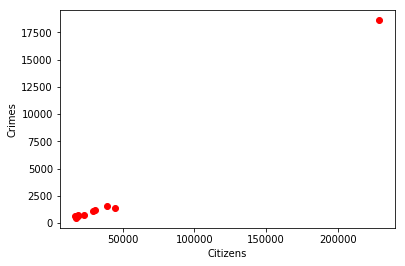

In [19]:
# Plot the number of crimes against the number of citizens.
# The number of Neighbourhoods is low and the difference in citizens with the major city Eindhoven is huge.
plt.scatter(df.Citizens, df.Crimes,  color='red')
plt.xlabel("Citizens")
plt.ylabel("Crimes")
plt.show()

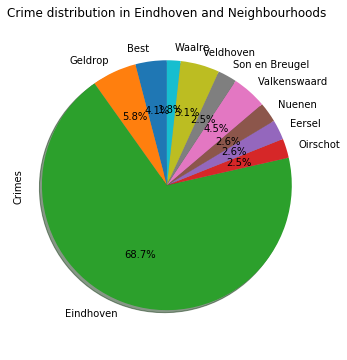

In [30]:
# Make a pie chart of the crime distribution:
df['Crimes'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Crime distribution in Eindhoven and Neighbourhoods')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [20]:
# A simple regression model can be applied to predict crime based on number of citizens:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(df[['Citizens']])
train_y = np.asanyarray(df[['Crimes']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficient: ', regr.coef_[0,0], 'Intercept: ',regr.intercept_[0])

Coefficient:  0.0859722545336 Intercept:  -1312.88071933


Text(0,0.5,'Crimes')

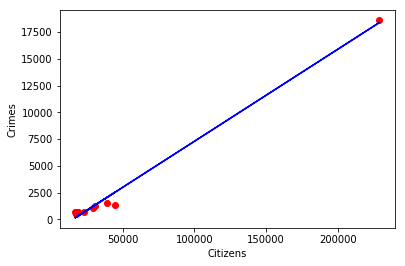

In [21]:
# Plot regression line in scatter plot:
plt.scatter(df.Citizens, df.Crimes,  color='red')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-b')
plt.xlabel("Citizens")
plt.ylabel("Crimes")

## DISCLAIMER

The number of Neighbourhoods is far too low to make general conclusions. The idea is only to show the possibilities in case bigger data sets would be used. In above case it might be very well possible that a 2nd order regression would better fit than a linear one.

## Nightclubs

I will now extract with FourSquare the number of nightclubs in Eindhoven as well its surrounding Neighbourhoods based on the assumped center dimensions as explained before.
The general terminology for a bar/nightclub in dutch is 'cafe'.

In [22]:
# Search query is 'cafe':
search_query = 'cafe'
# Set limit of query to 100:
limit = 100


In [23]:
# Create json (dictionary type) file from url request for every entry of df dataframe:
results = []
for i in range(0,len(df)):
    latitude = df.lat[i]
    longitude = df.lng[i]
    radius = df.Radius[i]
    # The url for FourSquare (including its variables):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, limit)
    results.append(requests.get(url).json())
results


[{'meta': {'code': 200, 'requestId': '5c0bd17d1ed2194a7515e318'},
  'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
        'suffix': '.png'},
       'id': '5744ccdfe4b0c0459246b4d0',
       'name': 'Dutch Restaurant',
       'pluralName': 'Dutch Restaurants',
       'primary': True,
       'shortName': 'Dutch'}],
     'hasPerk': False,
     'id': '597af61bf79faa1be905c846',
     'location': {'address': 'raadhuisplein',
      'cc': 'NL',
      'city': 'Best',
      'country': 'Nederland',
      'distance': 253,
      'formattedAddress': ['raadhuisplein', '5683 EC Best', 'Nederland'],
      'labeledLatLngs': [{'label': 'display',
        'lat': 51.511814,
        'lng': 5.3964233}],
      'lat': 51.511814,
      'lng': 5.3964233,
      'postalCode': '5683 EC',
      'state': 'Noord-Brabant'},
     'name': 'Grand Café De Bank',
     'referralId': 'v-1544278397'},
    {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.

In [24]:
# Extract all the venues from the resulting json file:
Bars = []
for i in range(0,len(df)): Bars.append(len(results[i]['response']['venues']))
# Add column Bars to df dataframe Bars series:
df['Bars'] = Bars
df.head(10)

,lat,lng,Crimes,Citizens,RelCrime,Radius,Bars
place,,,,,,,
Best,51.510017,5.398662,1100,29497,37,515,5
Geldrop,51.422199,5.559182,1565,39252,39,594,4
Eindhoven,51.439265,5.478633,18600,229126,81,1436,50
Oirschot,51.503239,5.315549,675,18558,36,408,7
Eersel,51.358637,5.320131,700,18778,37,411,2
Nuenen,51.486030,5.544007,705,23019,30,455,0
Valkenswaard,51.350688,5.459450,1220,30654,39,525,24
Son en Breugel,51.517813,5.491435,665,16753,39,388,0
Veldhoven,51.407706,5.392731,1370,44925,30,635,8


## Visualization of the Nightclub data in the scatter plot

I now will bring in the data of the bar density in the centers of the Neighbourhood into the same scatter plot.

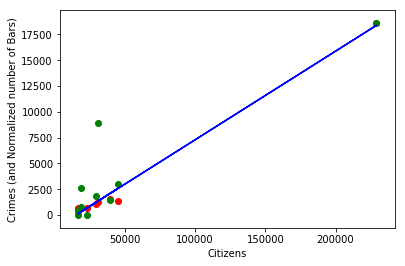

In [25]:
# Plot the number of crimes against the number of citizens in blue.
# And the number of nightclubs against crimes.
# The number of Neighbourhoods is low and the difference in bars with the major city Eindhoven is again huge.
# Normalize with max Crime:
norm =  df.Crimes.max()/df.Bars.max()
plt.scatter(df.Citizens, df.Crimes,  color='red')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-b')
plt.scatter(df.Citizens, norm*df.Bars,  color='green')
plt.xlabel("Citizens")
plt.ylabel("Crimes (and Normalized number of Bars)")
plt.show()

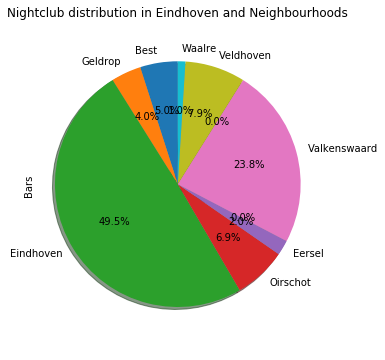

In [31]:
# Make a pie chart of the crime distribution:
df['Bars'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Nightclub distribution in Eindhoven and Neighbourhoods')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [41]:
df[["Crimes","Bars","Citizens"]].corr()

,Crimes,Bars,Citizens
Crimes,1.000000,0.905218,0.995706
Bars,0.905218,1.000000,0.909013
Citizens,0.995706,0.909013,1.000000


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


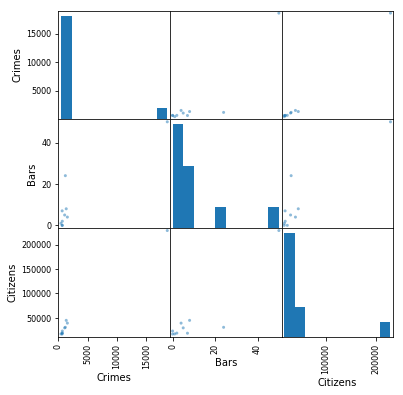

In [42]:
pd.scatter_matrix(df[["Crimes","Bars","Citizens"]], figsize=(6, 6))
plt.show()

## Visualization of Crimes in Eindhoven and its Neighbourhoods

In [28]:
# generate map centred around EindhovenL
Crime_map = folium.Map(location=[df.lat['Eindhoven'], df.lng['Eindhoven']], zoom_start=11)
# Visualize the crimes in the Neighbourhood separately from the one in Eindhoven:
maxCrimesNeig = df.Crimes.sort_values()[-2]

# add the Neighbourhood crimes as red circles with their size indicating the size:
for lat, lng, label, i in zip(df.lat, df.lng, df.index, range(0,len(df))):
    if label != 'Eindhoven':
        rad = int(30*df.Crimes[i]/maxCrimesNeig)
        folium.features.CircleMarker(
            [lat, lng],
            radius=rad,
            color='red',
            popup=str(df.Crimes[i]),
            fill = True,
            fill_color='red',
            fill_opacity=0.6
        ).add_to(Crime_map)

# add a black circle marker to represent the crimes of Eindhoven
folium.features.CircleMarker(
    [df.lat['Eindhoven'], df.lng['Eindhoven']],
    radius=20,
    color='black',
    popup=str(df.Crimes.max()),
    fill = True,
    fill_color = 'black',
    fill_opacity = 0.6
).add_to(Crime_map)        
# display map
Crime_map

In [29]:
## Visualization of Bars in Eindhoven and its Neighbourhoods

In [44]:
# generate map centred around EindhovenL
Bar_map = folium.Map(location=[df.lat['Eindhoven'], df.lng['Eindhoven']], zoom_start=11)
# Visualize the bars in the Neighbourhood separately from the one in Eindhoven:
maxBarsNeig = df.Bars.sort_values()[-2]

# add the Neighbourhood crimes as green circles with their size indicating the size:
for lat, lng, label, i in zip(df.lat, df.lng, df.index, range(0,len(df))):
    if label != 'Eindhoven':
        rad = int(50*df.Bars[i]/maxBarsNeig)
        folium.features.CircleMarker(
            [lat, lng],
            radius=rad,
            color='green',
            popup=str(df.Bars[i]),
            fill = True,
            fill_color='green',
            fill_opacity=0.6
        ).add_to(Bar_map)

# add a black circle marker to represent the bars of Eindhoven
folium.features.CircleMarker(
    [df.lat['Eindhoven'], df.lng['Eindhoven']],
    radius=20,
    color='black',
    popup=str(df.Bars.max()),
    fill = True,
    fill_color = 'black',
    fill_opacity = 0.6
).add_to(Bar_map)        
# display map
Bar_map

## Results

Different analysis shows a high correlation between Bars, Crimes and Citizens. Eindhoven is with respect to number of nightclubs, citizens and crimes an outlier with respect to its surrounding neighbours. Valkenswaard has a relatively high number of nightclubs compared to its neighbours. 

## Discussion

The high correlation does not necessarily mean that there also is a causality. For example the high correlation between nightclubs and crimes can also be due to the number of citizens. Comparing Eindhoven with its surrounding neighbourhoods is difficult due to its size. A follow up project could exclude Eindhoven, or split it up in different subareas which would have comparable sizes as Eindhoven. Also it would be interesting to extend the number of neighbourhoods with all the neighbourhoods around Eindhoven or even extend it to national scale. Another point to should be addressed is whether the information extracted from FourSquare has sufficient precision. First due to the fact that not all nightclubs are extracted and second because of the assumption that a center has been predicted based on population size of the corresponding city/neighbourhood.

## Conclusion

A direct conclusion is difficult to draw due to the limited number of samples, the outlier Eindhoven and the precision of the extraction of data from FourSquare. The visualization on maps but equally in tables and plots gives a better insight in for example the distribution of nightclubs. For example, there are far more nightclubs on the west side of Eindhoven than on the east side. While crime is more evenly spread around Eindhoven with a slightly more south versus north distribution. But again, a more elaborated set of neighbourhoods would probably give a more complete picture. If there is any recommendation to make towards for example the police, than it would be based on the historical crime numbers rather than on a combination with other parameters.

## Personal note

In this Capstone project I realized that these tools are so powerfull that you can easily and very fast come to an analysis and a visualization of your results. I strongly believe that these kind of toolsets need to be common practice in a wide range of disciplines to support decision making in all domains. In the near future, I will absolutely going to apply these tools in my profession.